In [92]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import blended_transform_factory
import shutil
import pandas as pd
import numpy as np
import ast

### Read all category csv files

In [93]:
topic_csv_dir = "topic_csv"

all_data_df = pd.read_csv(f"{topic_csv_dir}/all_results.csv")
print(f"Loaded file {topic_csv_dir}/all_results.csv with shape {all_data_df.shape}")
# convert Image column value to string
all_data_df["Image"] = all_data_df["Image"].astype(str)

# list all csv files in the directory
csv_files = [f for f in os.listdir(topic_csv_dir) if f != "all_results.csv"]
print(f"Now:, concatenating: {csv_files}")

# read all csv files and concatenate them into one dataframe
all_topic_df = pd.concat([pd.read_csv(os.path.join(topic_csv_dir, f)) for f in csv_files])
all_topic_df["Image"] = all_topic_df["Image"].astype(str)
print(f"Concatenated all csv files into one dataframe with shape {all_topic_df.shape}")

Loaded file topic_csv/all_results.csv with shape (60728, 35)
Now:, concatenating: ['N. Economy and work.csv', 'M. Race and ethnicity.csv', 'Q. Security.csv', 'J. News habits and media.csv', 'D. Politics and policy.csv', 'E. Demographics.csv', 'C. Science and technology.csv', 'L. Family and relationships.csv', 'G. International affairs.csv', 'A. Social values and attitudes.csv', 'I. Gender and LGBTQ.csv', 'B. Religion and spirituality.csv', 'O. Regions and countries.csv', 'K. Immigration and migration.csv', 'P. Methodological research.csv']
Concatenated all csv files into one dataframe with shape (60728, 35)


In [94]:
unique_questions_df = all_topic_df[all_topic_df['Image'] == 'True'][['question_topic', 'question_text', 'md_sim_topic', 'question_topic_mean_similarity', 'country']].drop_duplicates()
unique_questions_df = unique_questions_df.groupby(['question_topic', 'country'])
unique_questions_df.head(5)

,question_topic,question_text,md_sim_topic,question_topic_mean_similarity,country
1151,N. Economy and work,Now I'd like you to tell me your views on various issues. How would you place your views on this scale? 1 means you agree completely with the statement on the left; 10 means you agree completely w...,0.688920,0.583884,Bangladesh
1156,N. Economy and work,"Do you agree, disagree or neither agree nor disagree with the following statements?\n\nWhen jobs are scarce, men should have more right to a job than women",0.539033,0.583884,Bangladesh
1163,N. Economy and work,Now I'd like you to tell me your views on various issues. How would you place your views on this scale? 1 means you agree completely with the statement on the left; 10 means you agree completely w...,0.528933,0.583884,Bangladesh
1169,N. Economy and work,Now I'd like you to tell me your views on various issues. How would you place your views on this scale? 1 means you agree completely with the statement on the left; 10 means you agree completely w...,0.638958,0.583884,Bangladesh
1170,N. Economy and work,Here are two statements people sometimes make when discussing the environment and economic growth. Which of them comes closer to your own point of view?\n\nA. Protecting the environment should be ...,0.878187,0.583884,Bangladesh
...,...,...,...,...,...
11394,P. Methodological research,Vote in elections: Local level,0.684747,0.533095,Vietnam
11397,P. Methodological research,"Please tell me for each of the following statements whether you think it can always be justified, never be justified, or something in between, using this card.\n\nAbortion",0.540934,0.533095,Vietnam
11399,P. Methodological research,Some people think that having honest elections makes a lot of difference in their lives; other people think that it doesn’t matter much. How important would you say is having honest elections for ...,0.858904,0.533095,Vietnam
11400,P. Methodological research,Now I'd like you to tell me your views on various issues. How would you place your views on this scale? 1 means you agree completely with the statement on the left; 10 means you agree completely w...,0.645861,0.533095,Vietnam


### Plot Question Topic level similarity and JSD values for each country
- This is per country
- Note that all images are for people of same demographic group

In [95]:
all_data_df.columns

Index(['img_id', 'image_path', 'country', 'image_code', 'income',
       'question_text', 'country_prompt', 'generic_prompt', 'option_labels',
       'full_options', 'prompt', 'options', 'top10_token_prob',
       'prob_percent_sorted', 'sum_prob_percent_sorted', 'prob_percent_keys',
       'prob_percent_values', 'selection_answers', 'jsd', 'similarity',
       'Image', 'model_size', 'country_mean_jsd', 'coutry_mean_similarity',
       'question_topic', 'question_topic_mean_jsd',
       'question_topic_mean_similarity', 'md_topic_pred', 'md_topic_gt',
       'md_all_pred', 'md_all_gt', 'md_jsd_topic', 'md_sim_topic',
       'md_jsd_overall', 'md_sim_overall'],
      dtype='object')

In [96]:

ds_rich_countries = ["United States"]
ds_medium_countries = ["Brazil", "China", "South Africa" ]
ds_poor_countries = ["Nigeria", "Bangladesh", "Pakistan"]

country_list = ds_rich_countries + ds_medium_countries + ds_poor_countries

In [97]:
print(all_data_df['Image'].unique())
print(all_topic_df['Image'].dtype)

['False' 'True']
object


In [98]:


# # Directory to save individual figures
# individual_figures_dir = 'plots/individual_topic'
# if os.path.exists(individual_figures_dir):
#     shutil.rmtree(individual_figures_dir)
#     print(f"Existed! Deleted {individual_figures_dir} directory")
# os.makedirs(individual_figures_dir, exist_ok=True)

# # List of unique question topics
# question_topics = sorted(all_data_df['question_topic'].unique())

# # Prepare for plotting
# n_cols = 3  # Number of subplots per row
# n_rows = int(np.ceil(len(question_topics) / n_cols))

# fig_width = 6 * n_cols
# fig_height = 4 * n_rows
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
# axs = axs.flatten()  # Flatten the array of axes


# for idx, topic in enumerate(question_topics):
#     df_category = all_data_df[all_data_df['question_topic'] == topic]
    
#     # Convert 'Image' column to boolean
#     df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
#     # Calculate mean 'question_topic_mean_similarity' per country and Image scenario
#     df_mean = df_category.groupby(['country', 'Image'])['question_topic_mean_similarity'].mean().reset_index()
    
#     # Pivot the data to have Image scenarios as columns
#     df_pivot = df_mean.pivot(index='country', columns='Image', values='question_topic_mean_similarity').reset_index()
    
#     # Rename columns using boolean keys
#     df_pivot = df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'})
    
#     # Ensure both 'Text Similarity' and 'Image Similarity' columns exist
#     if 'Text Similarity' not in df_pivot.columns:
#         df_pivot['Text Similarity'] = np.nan
#     if 'Image Similarity' not in df_pivot.columns:
#         df_pivot['Image Similarity'] = np.nan
    
#     # Drop countries that have missing data in either scenario
#     df_pivot = df_pivot.dropna()
    
#     # Sort countries based on 'country_list'
#     df_pivot['country'] = pd.Categorical(df_pivot['country'], categories=country_list, ordered=True)

#     # Drop countries that have missing data in either scenario
#     df_pivot = df_pivot.dropna()
#     df_pivot = df_pivot.sort_values('country')
    
#     # Data for plotting
#     countries = df_pivot['country']
#     text_similarities = df_pivot['Text Similarity']
#     image_similarities = df_pivot['Image Similarity']
    
#     x = np.arange(len(countries))  # Label locations
#     width = 0.20  # Width of the bars
    
#     ax = axs[idx]
    
#     # Plot bars on the subplot
#     ax.bar(x - width/2, text_similarities, width, label= 'Only Country(No Images)')
#     ax.bar(x + width/2, image_similarities, width, label='Only Images(No Country)')
    
#     # Compute the mean similarity for the topic using text-level data only
#     text_mean = df_pivot['Text Similarity'].mean()
    
#     # Plot horizontal red dashed line at text_mean
#     ax.axhline(text_mean, color='red', linestyle='--')

#     # Create a blended transformation for the subplot
#     transform = blended_transform_factory(ax.transAxes, ax.transData)
    
#     # Annotate the mean value on the plot
#     ax.text(0.01, text_mean, f'{text_mean:.2f}', color='black', ha='left', va='bottom', transform=ax.get_yaxis_transform())
    
#     # Remove prefix (e.g., 'A.', 'B.', etc.) from topic name
#     topic_title = topic.split('.', 1)[-1].strip()
    
#     # Add labels, title, and custom x-axis tick labels
#     ax.set_ylabel('Mean Similarity')
#     ax.set_title(f'{topic_title}')
#     ax.set_xticks(x)
#     ax.set_xticklabels(countries, rotation=90)
#     ax.tick_params(axis='x', which='major', labelsize=8)
    
#     # Create individual figure for the topic
#     fig_individual, ax_individual = plt.subplots(figsize=(8, 4))
    
#     # Plot bars on the individual figure
#     ax_individual.bar(x - width/2, text_similarities, width, label= 'Only Country(No Images)', color='mediumpurple')
#     ax_individual.bar(x + width/2, image_similarities, width, label='Only Images(No Country)', color='rebeccapurple')
    
#     # Plot horizontal red dashed line at text_mean
#     ax_individual.axhline(text_mean, color='red', linestyle='--')
    
#     # Annotate the mean value on the individual plot
#     ax_individual.text(0.01, text_mean, f'{text_mean:.2f}', color='black', ha='left', va='bottom', transform=ax_individual.get_yaxis_transform())
    
#     # Add labels, title, and custom x-axis tick labels
#     ax_individual.set_ylabel('Mean Similarity')
#     ax_individual.set_title(f'{topic_title}')
#     ax_individual.set_xticks(x)
#     ax_individual.set_xticklabels(countries, rotation=90)
#     ax_individual.tick_params(axis='x', which='major', labelsize=8)
    
#     # Add legend to individual figure, located in the upper right corner outside the plot area
#     ax_individual.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=6)
    
#     # Adjust layout to make room for the legend
#     fig_individual.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend
    
#     # Save individual figure
#     fig_individual.savefig(os.path.join(individual_figures_dir, f'{topic_title}.png'), bbox_inches='tight')
#     plt.close(fig_individual)  # Close the figure to free memory
    
# # Remove empty subplots if any
# for idx in range(len(question_topics), n_rows * n_cols):
#     fig.delaxes(axs[idx])

# # Adjust layout to make room for the legend
# plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right

# # Add a single legend on the right
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.5), frameon=False)
# # Save the final figure with all subplots
# fig.savefig(f'{individual_figures_dir}/final_similarity_plot.png', bbox_inches='tight')

# plt.show()


Existed! Deleted plots/individual_topic directory


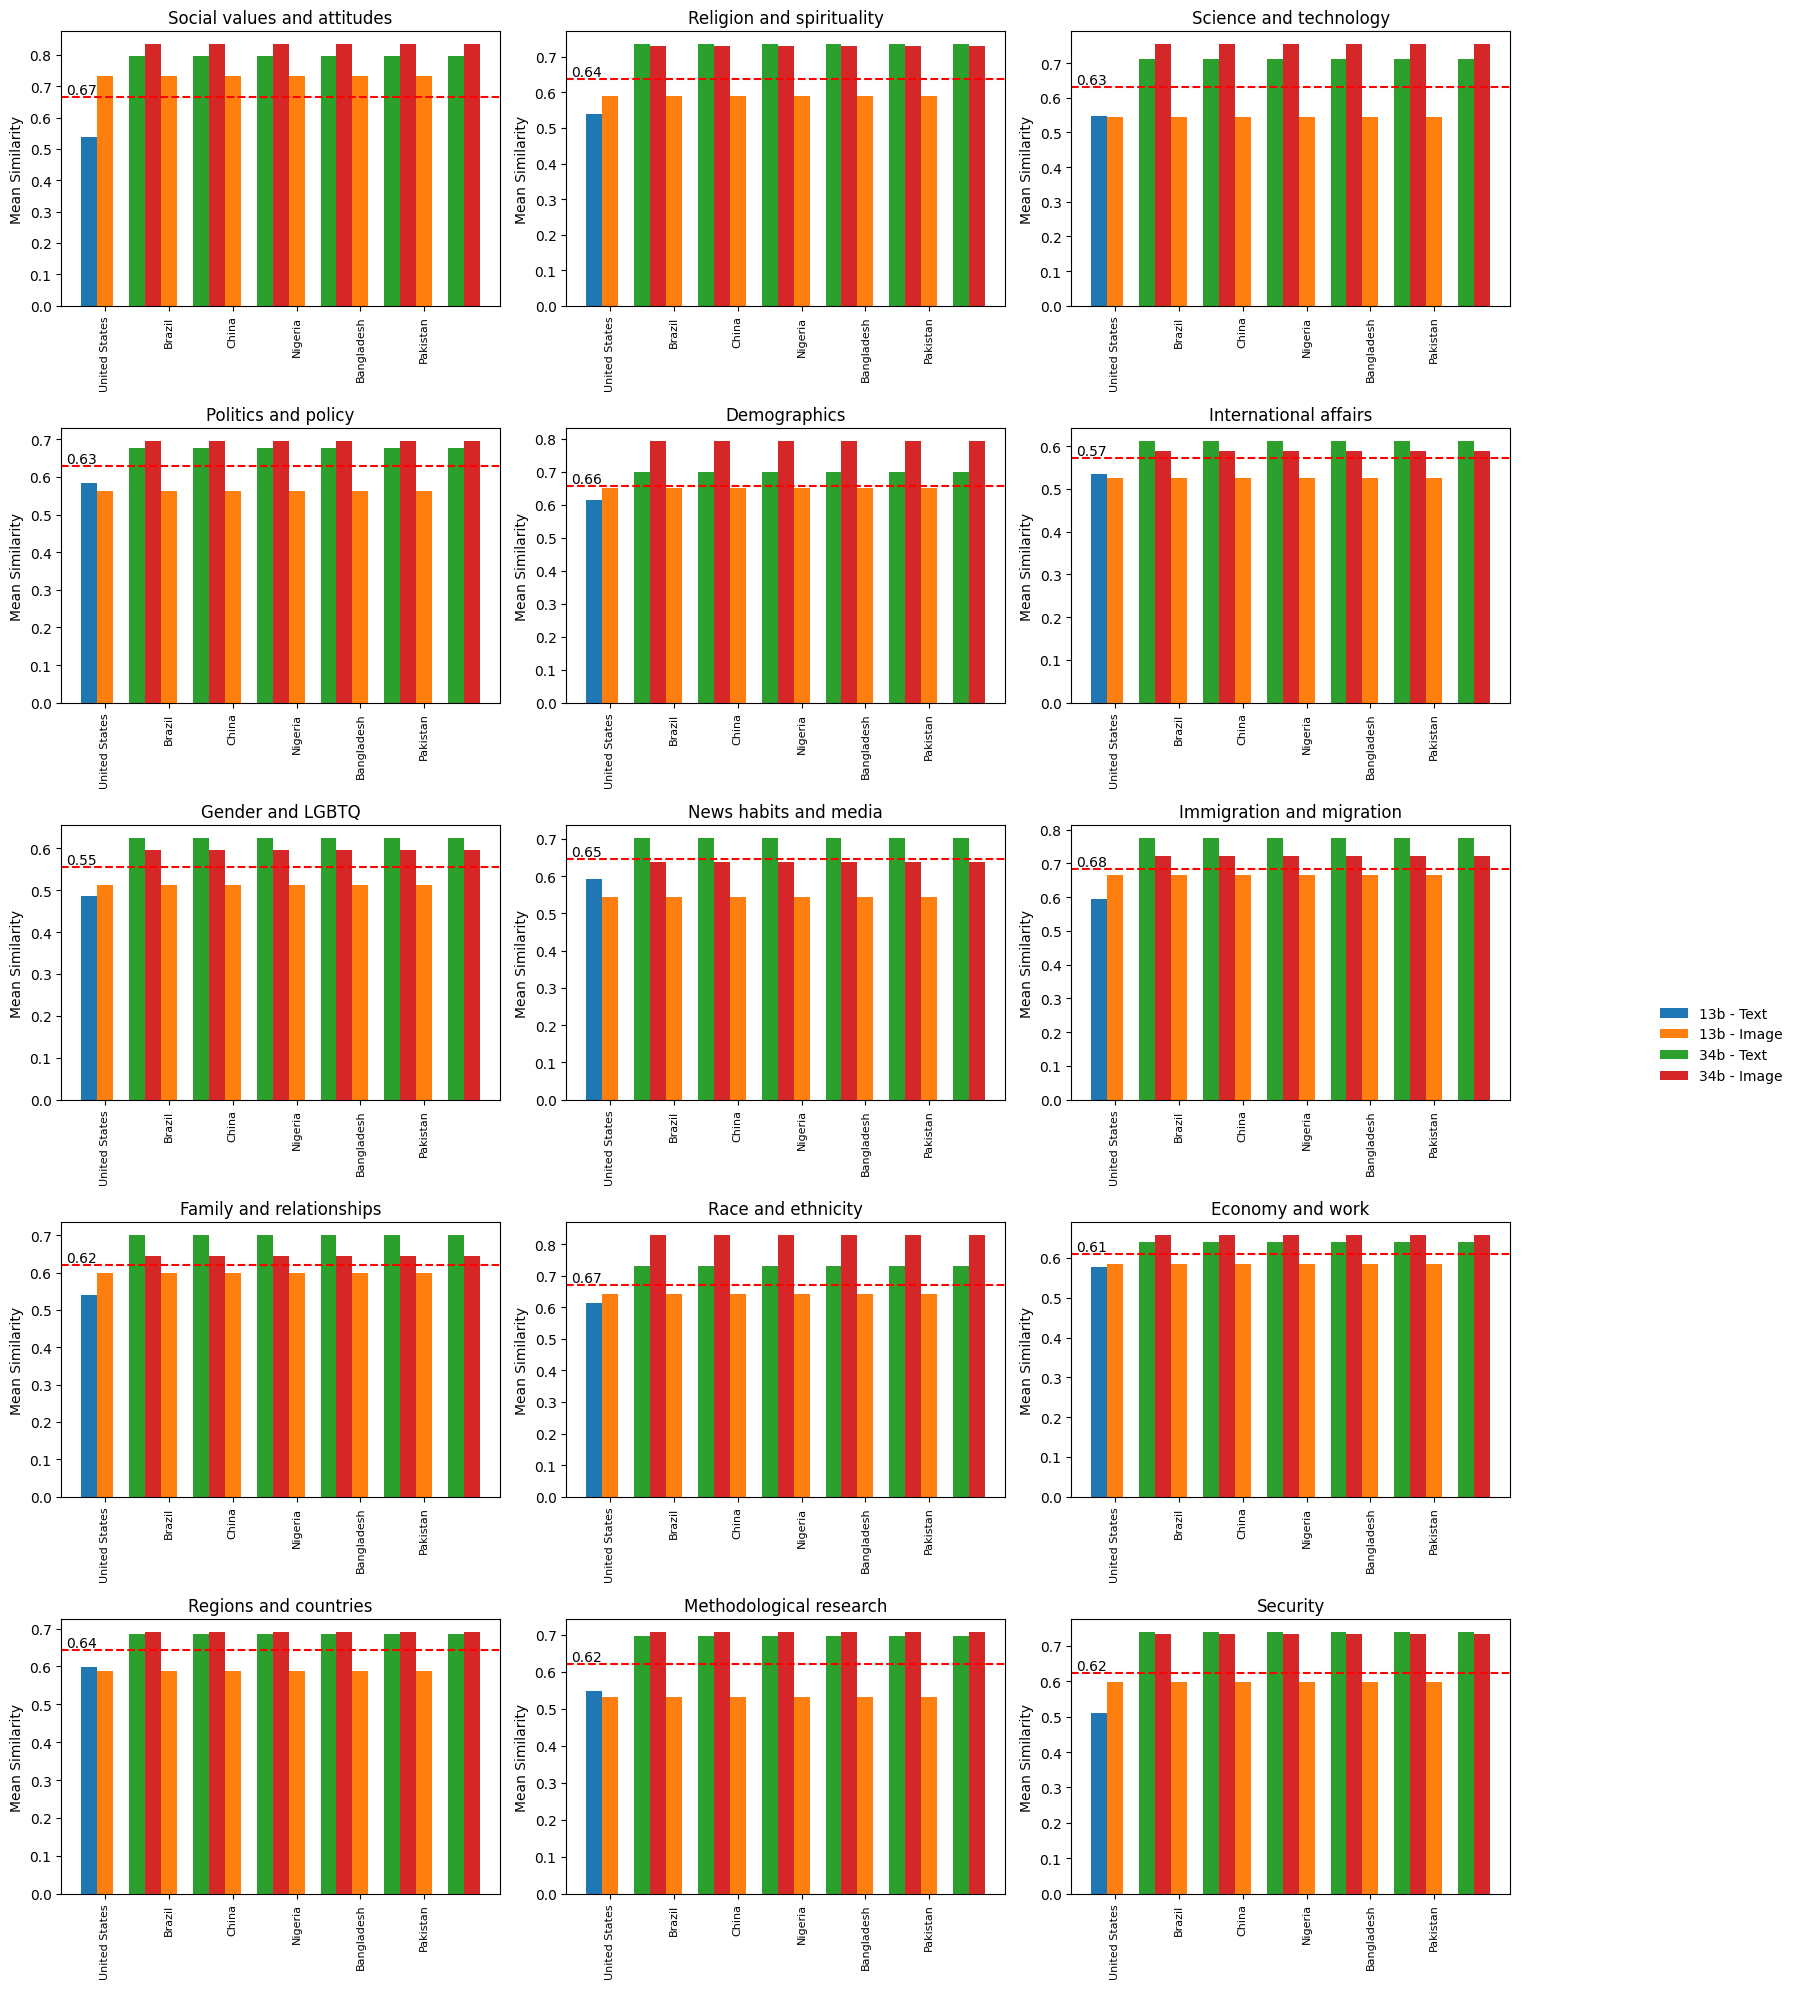

In [102]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from tqdm import tqdm

# Directory to save individual figures
individual_figures_dir = 'plots/individual_topic'
if os.path.exists(individual_figures_dir):
    shutil.rmtree(individual_figures_dir)
    print(f"Existed! Deleted {individual_figures_dir} directory")
os.makedirs(individual_figures_dir, exist_ok=True)

# List of unique question topics
question_topics = sorted(all_data_df['question_topic'].unique())
models = sorted(all_data_df['model_size'].unique())

# Prepare for plotting
n_cols = 3  # Number of subplots per row
n_rows = int(np.ceil(len(question_topics) / n_cols))

fig_width = 6 * n_cols
fig_height = 4 * n_rows
fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axs = axs.flatten()  # Flatten the array of axes

# Loop through each topic to create subplots
for idx, topic in enumerate(question_topics):
    df_category = all_data_df[all_data_df['question_topic'] == topic]

    # Prepare DataFrame by calculating means for each combination of 'country', 'Image', and 'model_size'
    df_category.loc[:, 'Image'] = df_category['Image'].map({'False': False, 'True': True})
    
    # Calculate mean 'question_topic_mean_similarity' and 'md_sim_topic' per country, Image scenario, and model_size
    df_mean = df_category.groupby(['country', 'Image', 'model_size'])[['question_topic_mean_similarity', 'md_sim_topic']].mean().reset_index()

    # Pivot the data to have Image scenarios as columns (Text Similarity, Image Similarity, and Baseline)
    df_pivot = df_mean.pivot_table(index=['country', 'model_size'], columns='Image', values='question_topic_mean_similarity').reset_index()
    
    # Handle the three columns for baseline, text, and image similarity
    df_pivot['Baseline Similarity'] = df_mean[df_mean['Image'] == True].groupby(['country', 'model_size'])['md_sim_topic'].mean().values
    df_pivot = df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'})

    # Ensure all similarity columns exist
    for col in ['Text Similarity', 'Image Similarity', 'Baseline Similarity']:
        if col not in df_pivot.columns:
            df_pivot[col] = np.nan
    

    # Sort countries based on 'country_list'
    df_pivot['country'] = pd.Categorical(df_pivot['country'], categories=country_list, ordered=True)
    df_pivot = df_pivot.sort_values('country')

    # Drop rows with missing data
    df_pivot = df_pivot.dropna()
    
    # Data for plotting
    countries = df_pivot['country'].unique()
    baseline_similarities = df_pivot['Baseline Similarity']
    text_similarities = df_pivot['Text Similarity']
    image_similarities = df_pivot['Image Similarity']
    
    x = np.arange(len(countries))  # Label locations
    width = 0.25  # Width of the bars for each model

    ax = axs[idx]
    
    # Loop through models and plot for each
    for model_idx, model in enumerate(models):
        df_model = df_pivot[df_pivot['model_size'] == model]
        
        breakpoint()
        # Drop rows where any of the similarity columns are NaN
        df_model = df_model.dropna()
        offset = model_idx * (width * 3)  # Offset between different models
        
        # Plot bars for baseline, text, and image similarity
        # ax.bar(x + offset - width, df_model['Baseline Similarity'], width, label=f'{model} - Baseline')
        ax.bar(x + offset, df_model['Text Similarity'], width, label=f'{model} - Text')
        ax.bar(x + offset + width, df_model['Image Similarity'], width, label=f'{model} - Image')
    
    # Compute the mean similarity for the topic using text-level data only
    text_mean = df_pivot['Text Similarity'].mean()
    
    # Plot horizontal red dashed line at text_mean
    ax.axhline(text_mean, color='red', linestyle='--')

    # Annotate the mean value on the plot
    ax.text(0.01, text_mean, f'{text_mean:.2f}', color='black', ha='left', va='bottom', transform=ax.get_yaxis_transform())
    
    # Remove prefix (e.g., 'A.', 'B.', etc.) from topic name
    topic_title = topic.split('.', 1)[-1].strip()
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_ylabel('Mean Similarity')
    ax.set_title(f'{topic_title}')
    ax.set_xticks(x + width)  # Adjust x-axis to center
    ax.set_xticklabels(countries, rotation=90)
    ax.tick_params(axis='x', which='major', labelsize=8)
    
    # Create individual figure for the topic
    fig_individual, ax_individual = plt.subplots(figsize=(15, 4))
    
    # Set the width of each bar and define the number of models
    width = 0.15  # Set the width for the bars
    gap_between_bars = 0.05  # A small gap between Text and Image bars within the same model
    gap_between_models = 0.4  # A larger gap between the two models' sets of bars


    # To ensure only one legend entry per type (Text, Baseline, Image)
    has_plotted_text = False
    has_plotted_baseline = False
    has_plotted_image = False

    # Plot bars for the individual figure
    for model_idx, model in enumerate(models):
        df_model = df_pivot[df_pivot['model_size'] == model]
        
        # Calculate the offset to center the bars around each x-tick
        if model_idx == 0:
            offset = -gap_between_models / 2  # Shift first model's bars to the left
        else:
            offset = gap_between_models / 2  # Shift second model's bars to the right
            
        if not has_plotted_text:
            # Plot the Text bars (Text and Image of the same model together)
            ax_individual.bar(x + offset - width / 2, df_model['Text Similarity'], width, label=f'{model} - Text', color='orange')
            has_plotted_text = True  # Prevent further labeling for Text
        else:
            ax_individual.bar(x + offset - width / 2, df_model['Text Similarity'], width, label=f'{model} - Text', color='orange')

        if not has_plotted_text:
            # Plot the Image bars, but place them slightly to the right of the Text bar (for the same model)
            ax_individual.bar(x + offset + width / 2 , df_model['Image Similarity'], width, label=f'{model} - Image', color='rebeccapurple')
            has_plotted_text = True  # Prevent further labeling for Text
        else:
            ax_individual.bar(x + offset + width / 2 , df_model['Image Similarity'], width, label=f'{model} - Image', color='rebeccapurple')
        
       # Add model name annotation above or below the group of bars
        for i in range(len(x)):
            # Calculate the center of the 3 bars for this model (Text, Baseline, Image)
            center_position = x[i] + offset + width / 2  # Adjust to center of the group
            ax_individual.text(center_position, -0.1, model, ha='center', va='bottom', fontsize=10, color='black')  # Move y-position below the axis


        # # Plot the Text bars, but only label them once for the legend
        # if not has_plotted_text:
        #     ax_individual.bar(x + offset - width - small_gap / 2, df_model['Text Similarity'], width, label='Text', color='royalblue')
        #     has_plotted_text = True  # Prevent further labeling for Text
        # else:
        #     ax_individual.bar(x + offset - width - small_gap / 2, df_model['Text Similarity'], width, color='royalblue')

        # # # Plot the Baseline bars, but only label them once for the legend
        # # if not has_plotted_baseline:
        # #     ax_individual.bar(x + offset, df_model['Baseline Similarity'], width, label='Baseline', color='orange')
        # #     has_plotted_baseline = True  # Prevent further labeling for Baseline
        # # else:
        # #     ax_individual.bar(x + offset, df_model['Baseline Similarity'], width, color='orange')

        # # Plot the Image bars, but only label them once for the legend
        # if not has_plotted_image:
        #     ax_individual.bar(x + offset + width + small_gap / 2, df_model['Image Similarity'], width, label='Image', color='rebeccapurple')
        #     has_plotted_image = True  # Prevent further labeling for Image
        # else:
        #     ax_individual.bar(x + offset + width + small_gap / 2, df_model['Image Similarity'], width, color='rebeccapurple')

    
        # Set x-ticks to be at the center of the groups of bars
        # The middle point of each set of bars is `x + offset` for the second model, so we can set the x-ticks for that
        x_tick_positions = x + gap_between_models / 2  # Centered at the midpoint of the grouped bars


    # Plot horizontal red dashed line at text_mean
    # ax_individual.axhline(text_mean, color='red', linestyle='--')
    
    # Annotate the mean value on the individual plot
    # ax_individual.text(0.01, text_mean, f'{text_mean:.2f}', color='black', ha='left', va='bottom', transform=ax_individual.get_yaxis_transform())
    
    # Add labels, title, and custom x-axis tick labels
    ax_individual.set_ylabel('Mean Similarity')
    ax_individual.set_title(f'{topic_title}')
    # Set x-ticks to be at the center of the groups of bars
    # The middle point of each set of bars is `x + offset` for the second model, so we can set the x-ticks for that
    x_tick_positions = x + gap_between_models / 2  # Centered at the midpoint of the grouped bars
    ax_individual.set_xticks(x_tick_positions)  # Set x-tick positions
    ax_individual.set_xticklabels(countries)  # Set x-tick labels (country names)
    ax_individual.tick_params(axis='x', which='major', labelsize=8)  # Adjust font size and appearance

    
    # Add legend to individual figure, located in the upper right corner outside the plot area
    ax_individual.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=6)
    
    # Adjust layout to make room for the legend
    fig_individual.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend
    
    # Save individual figure
    fig_individual.savefig(os.path.join(individual_figures_dir, f'{topic_title}.png'), bbox_inches='tight')
    plt.close(fig_individual)  # Close the figure to free memory
    
# Remove empty subplots if any
for idx in range(len(question_topics), n_rows * n_cols):
    fig.delaxes(axs[idx])

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right

# Add a single legend on the right
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.5), frameon=False)

# Save the final figure with all subplots
fig.savefig(f'{individual_figures_dir}/final_similarity_plot.png', bbox_inches='tight')

plt.show()


### Plot Question Topic level similarity and JSD values for each economic strate 
- This is per low income, middle income and high income
- Note that all images are for people of same demographic group

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import blended_transform_factory

# # Define income groups
# rich_countries = ["United States", "Russia", "Romania", "France", "Spain", "Italy", "South Korea"]
# medium_countries = ["Mexico", "Mongolia", "Brazil", "Colombia", "Iran", "Indonesia", "Philippines", "China"]
# poor_countries = ["Ethiopia", "Nigeria", "Egypt", "Kenya", "Vietnam", "Bangladesh", "Pakistan"]

# Create mapping from country to income group
country_income_group = {}
for country in ds_rich_countries:
    country_income_group[country] = 'Rich'
for country in ds_medium_countries:
    country_income_group[country] = 'Medium'
for country in ds_poor_countries:
    country_income_group[country] = 'Poor'

# Directory to save individual figures
individual_figures_dir = 'ds_wvs/individual_topic_figures_income_groups'
if os.path.exists(individual_figures_dir):
    shutil.rmtree(individual_figures_dir)
    print(f"Existed! Deleted {individual_figures_dir} directory")
os.makedirs(individual_figures_dir, exist_ok=True)

# List of unique question topics
question_topics = sorted(final_result['question_topic'].unique())

# Prepare for plotting
n_cols = 3  # Number of subplots per row
n_rows = int(np.ceil(len(question_topics) / n_cols))

fig_width = 6 * n_cols
fig_height = 4 * n_rows
fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axs = axs.flatten()  # Flatten the array of axes

for idx, topic in enumerate(question_topics):
    df_category = df_category_similarity[topic].copy()
    
    # Map 'country' to 'IncomeGroup'
    df_category['IncomeGroup'] = df_category['country'].map(country_income_group)
    
    # Remove rows with missing IncomeGroup
    df_category = df_category.dropna(subset=['IncomeGroup'])
    
    # Convert 'Image' column to boolean
    df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
    # Calculate mean 'question_topic_mean_similarity' per IncomeGroup and Image scenario
    df_mean = df_category.groupby(['IncomeGroup', 'Image'])['question_topic_mean_similarity'].mean().reset_index()
    
    # Pivot the data to have Image scenarios as columns
    df_pivot = df_mean.pivot(index='IncomeGroup', columns='Image', values='question_topic_mean_similarity').reset_index()
    
    # Rename columns using boolean keys
    df_pivot = df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'})
    
    # Ensure both 'Text Similarity' and 'Image Similarity' columns exist
    if 'Text Similarity' not in df_pivot.columns:
        df_pivot['Text Similarity'] = np.nan
    if 'Image Similarity' not in df_pivot.columns:
        df_pivot['Image Similarity'] = np.nan
    
    # Drop IncomeGroups that have missing data in either scenario
    df_pivot = df_pivot.dropna()
    
    # Sort IncomeGroups in the order Rich, Medium, Poor
    income_group_order = ['Rich', 'Medium', 'Poor']
    df_pivot['IncomeGroup'] = pd.Categorical(df_pivot['IncomeGroup'], categories=income_group_order, ordered=True)

    # Drop countries that have missing data in either scenario
    df_pivot = df_pivot.dropna()
    df_pivot = df_pivot.sort_values('IncomeGroup')
    
    # Data for plotting
    income_groups = df_pivot['IncomeGroup']
    text_similarities = df_pivot['Text Similarity']
    image_similarities = df_pivot['Image Similarity']
    
    x = np.arange(len(income_groups))  # Label locations
    width = 0.35  # Width of the bars
    
    ax = axs[idx]
    
    # Plot bars on the subplot
    ax.bar(x - width/2, text_similarities, width, label='Country Prompt- No Images')
    ax.bar(x + width/2, image_similarities, width, label='No Country Prompt- Only Images')
    
    # Compute the mean similarity for the topic using text-level data only
    text_mean = df_pivot['Text Similarity'].mean()
    
    # Plot horizontal red dashed line at text_mean
    ax.axhline(text_mean, color='red', linestyle='--')
    
    # Create a blended transformation for the subplot
    transform = blended_transform_factory(ax.transAxes, ax.transData)
    
    # Annotate the mean value on the plot (left end)
    ax.text(0.05, text_mean, f'{text_mean:.2f}', color='black',
            ha='left', va='bottom', transform=transform)
    
    # Remove prefix (e.g., 'A.', 'B.', etc.) from topic name
    topic_title = topic.split('.', 1)[-1].strip()
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_ylabel('Mean Similarity')
    ax.set_title(f'{topic_title}')
    ax.set_xticks(x)
    ax.set_xticklabels(income_groups, rotation=0)
    ax.tick_params(axis='x', which='major', labelsize=8)
    
    # Create individual figure for the topic
    fig_individual, ax_individual = plt.subplots(figsize=(6, 4))
    
    # Plot bars on the individual figure
    ax_individual.bar(x - width/2, text_similarities, width, label='Country Prompt- No Images')
    ax_individual.bar(x + width/2, image_similarities, width, label='No Country Prompt- Only Images')
    
    # Plot horizontal red dashed line at text_mean
    ax_individual.axhline(text_mean, color='red', linestyle='--')
    
    # Annotate the mean value on the individual plot (left end)
    ax_individual.text(0.05, text_mean, f'{text_mean:.2f}', color='black',
                       ha='left', va='bottom', transform=ax_individual.get_yaxis_transform())
    
    # Add labels, title, and custom x-axis tick labels
    ax_individual.set_ylabel('Mean Similarity')
    ax_individual.set_title(f'{topic_title}')
    ax_individual.set_xticks(x)
    ax_individual.set_xticklabels(income_groups, rotation=0)
    ax_individual.tick_params(axis='x', which='major', labelsize=8)
    
    # Add legend to individual figure, located in the upper right corner outside the plot area
    ax_individual.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
    
    # Adjust layout to make room for the legend
    fig_individual.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend
    
    # Save individual figure
    fig_individual.savefig(os.path.join(individual_figures_dir, f'{topic_title}.png'), bbox_inches='tight')
    plt.close(fig_individual)  # Close the figure to free memory

# Remove empty subplots if any
for idx in range(len(question_topics), n_rows * n_cols):
    fig.delaxes(axs[idx])

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right

# Add a single legend on the right
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

# Save the final figure with all subplots
fig.savefig(f'{individual_figures_dir}/final_similarity_plot_income_groups.png', bbox_inches='tight')

plt.show()


### Computer % change in similarity and JSD values for each question topic per income strata

In [ ]:
# Initialize a list to store the results
results = []

for topic in question_topics:
    df_category = df_category_similarity[topic].copy()
    
    # Map 'country' to 'IncomeGroup'
    df_category['IncomeGroup'] = df_category['country'].map(country_income_group)
    
    # Remove rows with missing IncomeGroup
    df_category = df_category.dropna(subset=['IncomeGroup'])
    
    # Convert 'Image' column to boolean if not already
    if df_category['Image'].dtype == object:
        df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
    # For each income group
    for income_group in ['Rich', 'Medium', 'Poor']:
        df_group = df_category[df_category['IncomeGroup'] == income_group]
        
        # Mean 'Text Similarity' (Image == False)
        text_similarity_mean = df_group[df_group['Image'] == False]['question_topic_mean_similarity'].mean()
        
        # Mean 'Image Similarity' (Image == True)
        image_similarity_mean = df_group[df_group['Image'] == True]['question_topic_mean_similarity'].mean()
        
        # Compute percentage change from 'Text Similarity' to 'Image Similarity'
        if text_similarity_mean != 0 and not pd.isnull(text_similarity_mean):
            percentage_change = ((image_similarity_mean - text_similarity_mean) / text_similarity_mean) * 100
        else:
            percentage_change = None  # or np.nan
        
        # Store the result
        results.append({
            'Topic': topic,
            'IncomeGroup': income_group,
            'Text Similarity IG Mean': text_similarity_mean,
            'Image Similarity IG Mean': image_similarity_mean,
            'Percentage Change': percentage_change
        })

# Convert results to DataFrame
df_variance_income_groups = pd.DataFrame(results)

df_variance_income_groups.head(4)

In [ ]:
# Pivot the DataFrame to have topics as columns and similarity and percentage change as rows
df_pivot_topicwise = df_variance_income_groups.pivot(index='IncomeGroup', columns='Topic', values=['Text Similarity IG Mean', 'Image Similarity IG Mean', 'Percentage Change'])

# Flatten the MultiIndex columns
df_pivot_topicwise.columns = ['_'.join(col).strip() for col in df_pivot_topicwise.columns.values]

# Display the updated DataFrame with only % change columns
df_pivot_topicwise = df_pivot_topicwise.filter(like='Percentage Change', axis=1)
df_pivot_topicwise = df_pivot_topicwise.reindex(['Rich', 'Medium', 'Poor'])
df_pivot_topicwise